<a href="https://colab.research.google.com/github/captivus/audible_matchmaker/blob/master/20210601_captivus_tabular_learner_fail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai  # upgrade fastai on colab

     |████████████████████████████████| 204kB 6.9MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 


In [3]:
from fastai.tabular.all import *

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/captivus/20210601---captivus_rental_data_clean_subset/eeeb40777dbe94a10d3c34bce4b39eb6e09a168c/20210601%20-%20captivus_rental_data_clean_subset.csv')
df.head()

,Rent Price:,List Date:,Year Built:,Township:,Parking:,Rooms:,Bedrooms:
0,900.0,04/17/2020,1976.0,Oswego,Exterior Space(s),3.0,1.0
1,1196.0,04/16/2020,1987.0,Naperville,"Garage, Exterior Space(s)",4.0,1.0
2,1540.0,04/16/2020,2019.0,Dundee,"Garage, Exterior Space(s)",3.0,1.0
3,1650.0,04/16/2020,2019.0,Dundee,"Garage, Exterior Space(s)",3.0,1.0
4,1150.0,04/14/2020,1980.0,Hanover,Exterior Space(s),3.0,1.0


In [7]:
cat_names_list = ['List Date:',	'Township:', 'Parking:']
cont_names_list = ['Rent Price:',	'Year Built:',	'Rooms:',	'Bedrooms:']
cont_names_list.remove('Rent Price:')

In [8]:
splits = RandomSplitter(valid_pct=0.20)(range_of(df))
tdf = TabularPandas(
    df=df,
    procs=[Categorify, FillMissing, Normalize],
    cat_names=cat_names_list,
    cont_names=cont_names_list,
    y_names='Rent Price:',
    splits=splits
)

In [9]:
dls = tdf.dataloaders(bs=64)

In [10]:
dls.show_batch()

,List Date:,Township:,Parking:,Year Built:_na,Bedrooms:_na,Year Built:,Rooms:,Bedrooms:,Rent Price:
0,02/24/2019,Algonquin,Exterior Space(s),False,False,1996.000001,4.0,1.0,1150.0
1,03/09/2020,Aurora,Exterior Space(s),False,False,1980.000000,3.0,1.0,995.0
2,03/26/2020,Hanover,Garage,False,False,1995.000000,7.0,3.0,1900.0
3,05/10/2019,Elgin,Exterior Space(s),False,False,1919.999998,3.0,1.0,800.0
4,05/28/2019,Aurora,Exterior Space(s),False,False,1972.000000,3.0,1.0,1075.0
5,04/30/2019,McHenry,Exterior Space(s),False,False,1998.000000,4.0,1.0,1150.0
6,01/30/2019,Aurora,Exterior Space(s),False,False,1975.000000,3.0,1.0,875.0
7,04/16/2020,Algonquin,Garage,False,False,2005.000001,6.0,3.0,1650.0
8,04/07/2020,Naperville,Garage,False,False,2002.000001,6.0,3.0,1875.0
9,01/11/2020,Hanover,Exterior Space(s),False,False,1973.000000,3.0,1.0,1000.0


In [28]:
learn = tabular_learner(dls, metrics=accuracy)

In [29]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,1823619.375000,1676697.375000,0.000000,00:00


In [30]:
learn.show_results()

,List Date:,Township:,Parking:,Year Built:_na,Bedrooms:_na,Year Built:,Rooms:,Bedrooms:,Rent Price:,Rent Price:_pred
0,194.0,10.0,1.0,1.0,1.0,-1.313952,-0.170243,0.707423,1400.0,0.017574
1,180.0,2.0,1.0,1.0,1.0,-0.089485,-0.170243,-0.672914,1075.0,-0.045065
2,58.0,21.0,2.0,1.0,1.0,0.394607,3.376482,2.087760,1595.0,0.362290
3,50.0,20.0,2.0,1.0,1.0,0.480035,1.248447,0.707423,1500.0,0.126412
4,75.0,10.0,1.0,1.0,1.0,-2.139755,-2.298278,-0.672914,850.0,-0.111791
5,114.0,10.0,4.0,1.0,1.0,-1.285476,-1.588933,-0.672914,880.0,-0.092330
6,150.0,2.0,1.0,1.0,1.0,-0.089485,-0.170243,-0.672914,875.0,-0.043211
7,22.0,15.0,2.0,1.0,1.0,0.907175,0.539102,0.707423,1495.0,0.095337
8,73.0,19.0,1.0,1.0,1.0,-0.231864,-0.879588,-0.672914,1000.0,-0.063275


In [31]:
learn.loss_func

FlattenedLoss of MSELoss()

Rightho -- changing the metric to rmse per the good folks in the FastAI Discord server ...

In [40]:
learn2 = tabular_learner(dls, metrics=rmse)

In [41]:
learn2.fit_one_cycle(1)

epoch,train_loss,valid_loss,_rmse,time
0,1794779.250000,1676673.000000,1294.864136,00:00


In [42]:
learn2.show_results()

,List Date:,Township:,Parking:,Year Built:_na,Bedrooms:_na,Year Built:,Rooms:,Bedrooms:,Rent Price:,Rent Price:_pred
0,58.0,1.0,1.0,1.0,1.0,-1.655663,-0.879588,-0.672914,975.0,-0.055521
1,125.0,10.0,1.0,1.0,1.0,-1.313952,-0.879588,-0.672914,1250.0,-0.049364
2,92.0,30.0,2.0,1.0,1.0,0.821747,0.539102,0.707423,1550.0,0.124942
3,158.0,1.0,4.0,1.0,1.0,0.565463,-0.170243,-0.672914,1050.0,0.030284
4,163.0,13.0,1.0,1.0,1.0,-0.772908,-0.170243,-0.672914,1200.0,-0.005342
5,66.0,6.0,1.0,1.0,1.0,1.277362,-0.879588,-0.672914,1300.0,0.016423
6,4.0,25.0,4.0,1.0,1.0,-0.943764,-0.879588,-0.672914,850.0,-0.034380
7,123.0,25.0,1.0,1.0,1.0,-1.427855,-1.588933,-0.672914,650.0,-0.075523
8,46.0,11.0,1.0,1.0,1.0,-0.715956,0.539102,0.707423,1200.0,0.070260


SuggestedLRs(lr_min=0.33113112449646, lr_steep=0.43651583790779114)

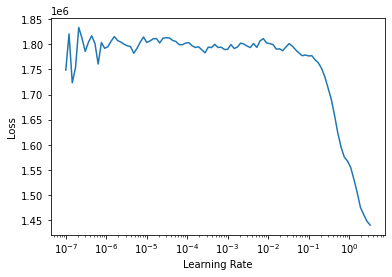

In [43]:
learn2.lr_find()

In [44]:
learn2.fit_one_cycle(n_epoch=15, lr_max=0.33113112449646)

epoch,train_loss,valid_loss,_rmse,time
0,1780558.500000,1681775.875000,1296.833008,00:00
1,1752206.500000,1628746.625000,1276.223633,00:00
2,1567385.625000,4695101.500000,2166.818359,00:00
3,1192478.750000,1049873.125000,1024.633179,00:00
4,936559.125000,216838.734375,465.659424,00:00
5,745520.375000,310229.750000,556.982727,00:00
6,605777.750000,116190.750000,340.867645,00:00
7,501642.250000,46963.039062,216.709579,00:00
8,420739.312500,51540.375000,227.025055,00:00
9,357851.718750,54445.210938,233.334976,00:00


In [45]:
learn2.show_results()

,List Date:,Township:,Parking:,Year Built:_na,Bedrooms:_na,Year Built:,Rooms:,Bedrooms:,Rent Price:,Rent Price:_pred
0,114.0,10.0,4.0,1.0,1.0,-1.285476,-1.588933,-0.672914,880.0,1123.370972
1,93.0,24.0,4.0,1.0,1.0,0.935651,-0.170243,-0.672914,1725.0,1670.433228
2,213.0,10.0,4.0,1.0,1.0,0.764795,-0.170243,-0.672914,640.0,1496.054688
3,101.0,1.0,2.0,1.0,1.0,0.565463,0.539102,0.707423,1495.0,1401.902344
4,101.0,10.0,1.0,1.0,1.0,-0.488148,-0.879588,-0.672914,800.0,1005.371948
5,128.0,1.0,1.0,1.0,1.0,-0.032533,-0.170243,-0.672914,1150.0,1178.558105
6,50.0,20.0,2.0,1.0,1.0,0.480035,1.248447,0.707423,1500.0,1450.394043
7,88.0,5.0,2.0,2.0,1.0,0.366131,1.248447,2.087760,1795.0,1412.745728
8,156.0,16.0,1.0,1.0,1.0,-0.431196,-0.879588,-0.672914,850.0,1010.597168
